# Exploratory Data Analysis (EDA) for Rossmann Pharmaceutical Data Analysis
## What this notebook does is:

- Load the data
- Perform basic statistics on the data

In [1]:
# Import necessary libraries
import sys
import os
import logging
import pandas as pd

In [2]:
# Get the current working directory of the project
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# # Insert the path to the Scripts directory
# sys.path.insert(0, os.path.join(parent_dir, 'Scripts'))

# print(sys.path)

c:\Users\HP\Desktop\KAIM-Cohort-3\Week 4\rossmann-pharmaceutical-ml-and-dl-sales-forecasting\notebooks
c:\Users\HP\Desktop\KAIM-Cohort-3\Week 4\rossmann-pharmaceutical-ml-and-dl-sales-forecasting


In [3]:
# Import custom scripts
from scripts.data_cleaning import preprocess_holidays, preprocess_date
from scripts.feature_engineering import add_weekend_flag, compute_weekday_averages
from scripts.analysis import analyze_store_performance, analyze_weekly_trends, analyze_holiday_impact
from scripts.visualizations import plot_time_trends, plot_store_sales, plot_weekday_sales, plot_correlation_heatmap

In [4]:
# Configure logging
logging.basicConfig(
    level=logging.INFO,  # Use DEBUG for detailed logs
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler("../logs/eda_process.log"),  # Log to a file
        logging.StreamHandler()  # Log to the console
    ]
)

logger = logging.getLogger()


In [5]:
# Load the dataset
try:
    logger.info("Loading training dataset.")
    train = pd.read_csv('../data/train.csv')
    logger.info("Dataset loaded successfully. Shape: %s", train.shape)
except Exception as e:
    logger.error("Error loading dataset: %s", e)
    raise

2025-01-03 15:16:22,348 - INFO - Loading training dataset.
C:\Users\HP\AppData\Local\Temp\ipykernel_15164\1447982176.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')
2025-01-03 15:16:22,783 - INFO - Dataset loaded successfully. Shape: (1017209, 9)


In [6]:
# Data Cleaning
try:
    logger.info("Starting data cleaning.")
    train = preprocess_holidays(train)
    train = preprocess_date(train)
    logger.info("Data cleaning completed successfully.")
except Exception as e:
    logger.error("Error during data cleaning: %s", e)
    raise

2025-01-03 15:16:22,794 - INFO - Starting data cleaning.
2025-01-03 15:16:23,004 - INFO - Data cleaning completed successfully.


In [7]:
# Feature Engineering
try:
    logger.info("Starting feature engineering.")
    train = add_weekend_flag(train)
    train = compute_weekday_averages(train)
    logger.info("Feature engineering completed successfully.")
except Exception as e:
    logger.error("Error during feature engineering: %s", e)
    raise

2025-01-03 15:16:23,015 - INFO - Starting feature engineering.
2025-01-03 15:16:23,228 - INFO - Feature engineering completed successfully.


In [8]:
# Analysis
try:
    logger.info("Starting analysis.")
    store_summary = analyze_store_performance(train)
    weekday_summary = analyze_weekly_trends(train)
    holiday_summary = analyze_holiday_impact(train)
    logger.info("Analysis completed successfully.")
except Exception as e:
    logger.error("Error during analysis: %s", e)
    raise

2025-01-03 15:16:23,237 - INFO - Starting analysis.
2025-01-03 15:16:23,400 - INFO - Analysis completed successfully.


2025-01-03 15:16:23,408 - INFO - Starting visualizations.


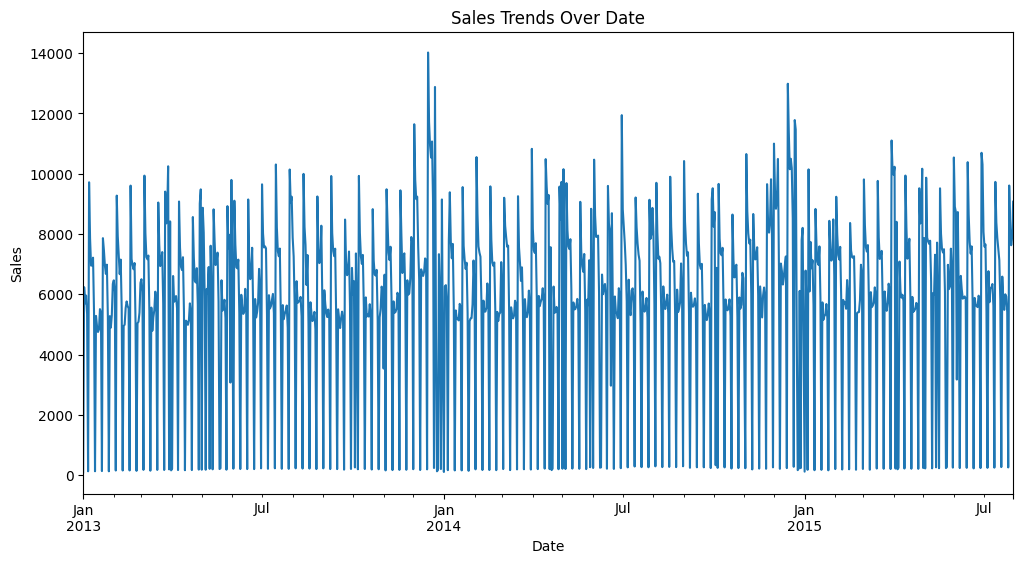

2025-01-03 15:16:23,803 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
c:\Users\HP\Desktop\KAIM-Cohort-3\Week 4\rossmann-pharmaceutical-ml-and-dl-sales-forecasting\scripts\visualizations.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Store', y='Store_avg_sales', palette='viridis')
2025-01-03 15:16:23,819 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


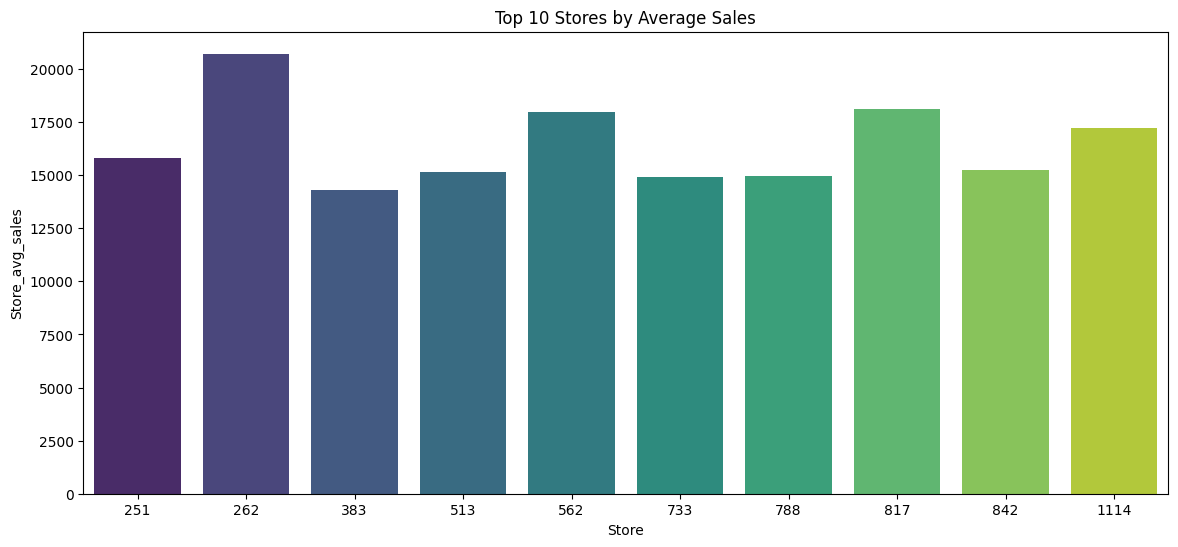

2025-01-03 15:16:24,055 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
c:\Users\HP\Desktop\KAIM-Cohort-3\Week 4\rossmann-pharmaceutical-ml-and-dl-sales-forecasting\scripts\visualizations.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, x='Store', y='Store_avg_sales', palette='viridis')
2025-01-03 15:16:24,064 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


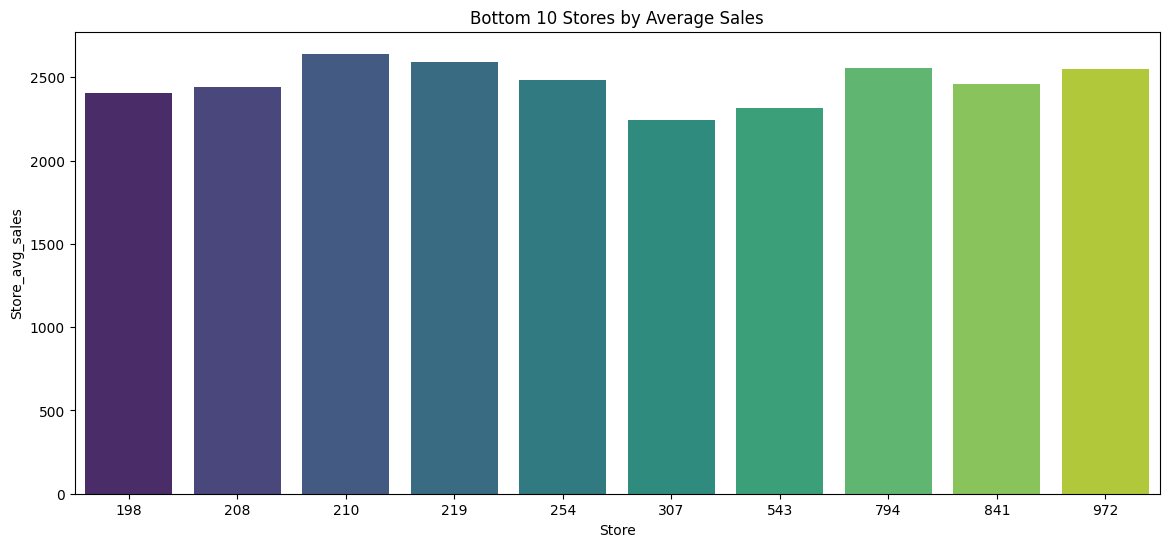

2025-01-03 15:16:24,209 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
c:\Users\HP\Desktop\KAIM-Cohort-3\Week 4\rossmann-pharmaceutical-ml-and-dl-sales-forecasting\scripts\visualizations.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_summary, x='DayOfWeek', y='Avg_Sales', palette='coolwarm')
2025-01-03 15:16:24,218 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


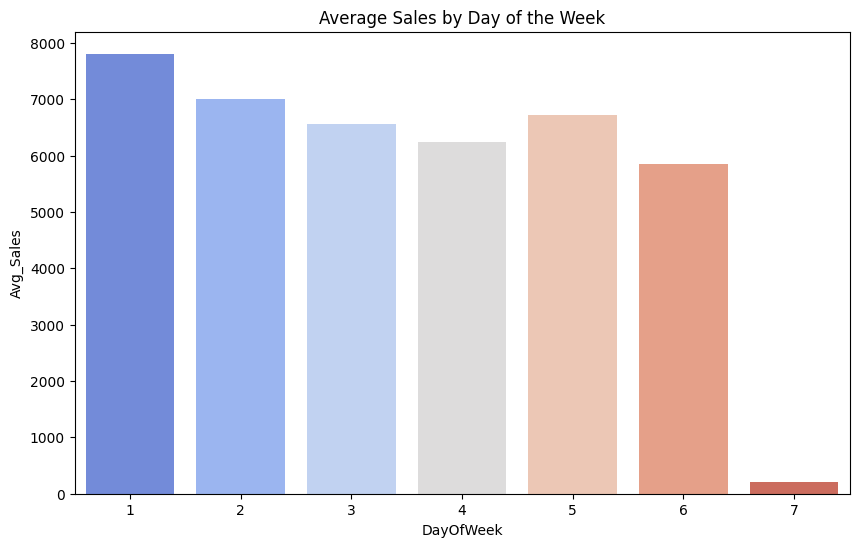

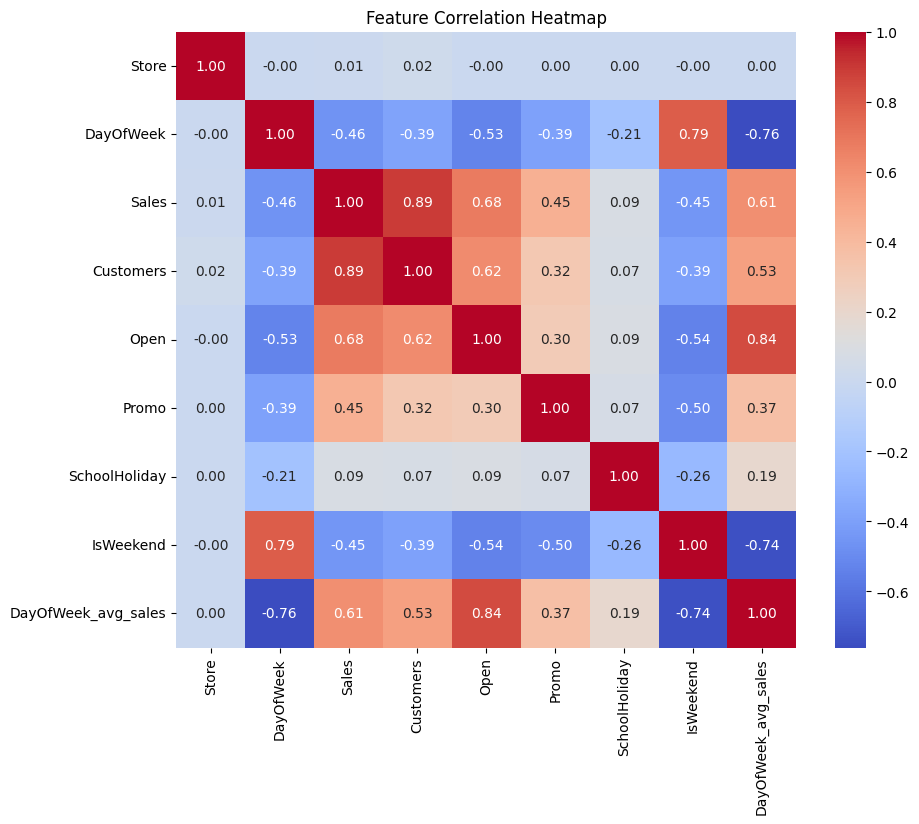

2025-01-03 15:16:24,856 - INFO - Visualizations completed successfully.


In [9]:
# Visualizations
try:
    logger.info("Starting visualizations.")
    plot_time_trends(train, 'Date', 'Sales')
    plot_store_sales(store_summary)
    plot_weekday_sales(weekday_summary)
    plot_correlation_heatmap(train)
    logger.info("Visualizations completed successfully.")
except Exception as e:
    logger.error("Error during visualizations: %s", e)
    raise